# 데이터셋 로드하기

Spot Nuclei. Speed Cures.
Imagine speeding up research for almost every disease, from lung cancer and heart disease to rare disorders. The 2018 Data Science Bowl offers our most ambitious mission yet: create an algorithm to automate nucleus detection.

We’ve all seen people suffer from diseases like cancer, heart disease, chronic obstructive pulmonary disease, Alzheimer’s, and diabetes. Many have seen their loved ones pass away. Think how many lives would be transformed if cures came faster.

By automating nucleus detection, you could help unlock cures faster—from rare disorders to the common cold. Want a snapshot about the 2018 Data Science Bowl? View this video.

Why nuclei?
Identifying the cells’ nuclei is the starting point for most analyses because most of the human body’s 30 trillion cells contain a nucleus full of DNA, the genetic code that programs each cell. Identifying nuclei allows researchers to identify each individual cell in a sample, and by measuring how cells react to various treatments, the researcher can understand the underlying biological processes at work.

By participating, teams will work to automate the process of identifying nuclei, which will allow for more efficient drug testing, shortening the 10 years it takes for each new drug to come to market. Check out this video overview to find out more.

https://www.kaggle.com/c/data-science-bowl-2018/overview

In [1]:
!wget https://github.com/mi2rl/datasets/raw/master/segmentation_training.zip

--2019-07-30 08:30:21--  https://github.com/mi2rl/datasets/raw/master/segmentation_training.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/mi2rl/datasets/master/segmentation_training.zip [following]
--2019-07-30 08:30:21--  https://media.githubusercontent.com/media/mi2rl/datasets/master/segmentation_training.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86298398 (82M) [application/zip]
Saving to: ‘segmentation_training.zip.4’

segmentation_traini 100%[===================>]  82.30M   117MB/s    in 0.7s    

2019-07-30 08:30:24 (117 MB/s) - ‘segmentation_training.zip.4’ saved

In [2]:
!ls

sample_data			segmentation_training.zip.1  stage1_train
segmentation_training.tar.gz	segmentation_training.zip.2  temp
segmentation_training.tar.gz.1	segmentation_training.zip.3
segmentation_training.zip	segmentation_training.zip.4


In [3]:
!ls -l

total 168656
drwxr-xr-x   1 root root     4096 Jul 19 16:14 sample_data
-rw-r--r--   1 root root      133 Jul 30 07:40 segmentation_training.tar.gz
-rw-r--r--   1 root root      133 Jul 30 07:43 segmentation_training.tar.gz.1
-rw-r--r--   1 root root      133 Jul 30 07:54 segmentation_training.zip
-rw-r--r--   1 root root      133 Jul 30 07:56 segmentation_training.zip.1
-rw-r--r--   1 root root      133 Jul 30 07:58 segmentation_training.zip.2
-rw-r--r--   1 root root 86298398 Jul 30 08:20 segmentation_training.zip.3
-rw-r--r--   1 root root 86298398 Jul 30 08:30 segmentation_training.zip.4
drwxr-xr-x 672 root root    73728 Jul 15 08:17 stage1_train
drwxr-xr-x   2 root root     4096 Jul 30 08:01 temp


In [5]:
import warnings
import random
import numpy as np
import os
import sys
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

# 파라미터 셋팅
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH = 'stage1_train/'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

# os.walk: 하위 디렉토리의 파일리스트 가져오기
train_ids = next(os.walk(TRAIN_PATH))[1]
# test_ids = next(os.walk(TEST_PATH))[1]

# 학습데이터 로딩 (셀 영상과 정답영상 읽어들인 후 128 x 128로 리사이즈)
X_all = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y_all = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing all images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_all[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    y_all[n] = mask

# # 평가데이터 로딩 (셀 영상을 읽어들인 후 128 x 128로 리사이즈)
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []
# print('Getting and resizing test images ... ')
# sys.stdout.flush()
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     path = TEST_PATH + id_
#     img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
#     sizes_test.append([img.shape[0], img.shape[1]])
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img
# print('Done!')

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

Getting and resizing all images and masks ... 


100%|██████████| 670/670 [13:01<00:00,  3.12it/s]


NameError: ignored

In [132]:
print('X_train',X_train.shape)
print('X_valid',X_valid.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_valid',y_valid.shape)



X_train (428, 128, 128, 3)
X_valid (108, 128, 128, 3)
X_test (134, 128, 128, 3)
y_train (428, 128, 128, 1)
y_valid (108, 128, 128, 1)


# $$123

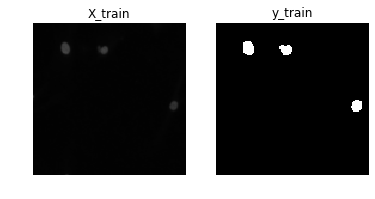

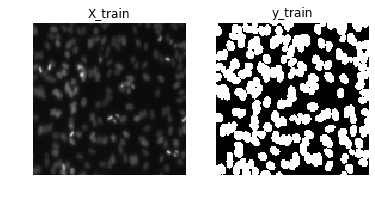

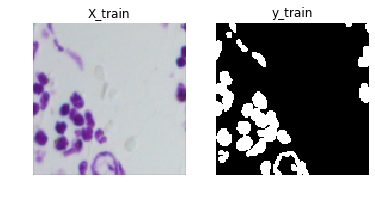

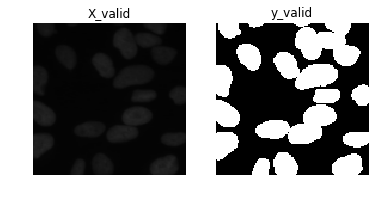

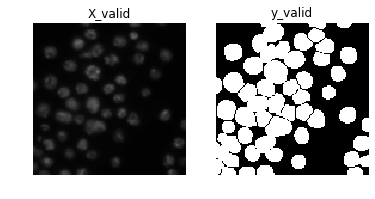

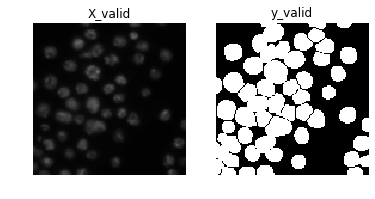

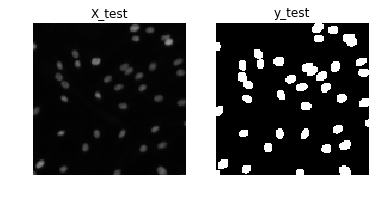

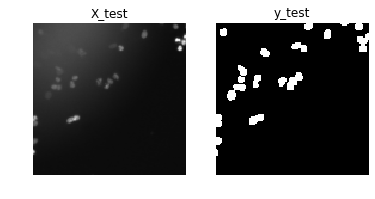

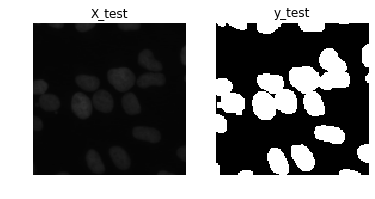

In [8]:
import matplotlib.pyplot as plt

def plotTrainData(a,b,c):
    for i in range(3):
        ix = random.randint(0, len(a))
        plt.subplot(1,2,1)
        plt.title("X_" + c)
        plt.imshow(a[ix], 'gray')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.title("y_" + c)
        plt.imshow(np.squeeze(b[ix]), 'gray')
        plt.axis('off')
        plt.show()
        
plotTrainData(X_train,y_train, 'train')
plotTrainData(X_valid,y_valid, 'valid')
plotTrainData(X_test,y_test, 'test')

# Loss 및 matrix  정의하기

## Cross Entropy

https://datascience.stackexchange.com/questions/38966/how-to-read-the-output-of-binary-cross-entropy

In [10]:
import tensorflow as tf

softmax_data = [0.5, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]
 
softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)
 
# ToDo: Print cross entropy from session
cross_entropy = -tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))
 
with tf.Session() as sess:
    print(sess.run(cross_entropy, feed_dict={softmax: softmax_data, one_hot: one_hot_data}))

0.6931472


## Dice coefficient

In [0]:
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [13]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)


def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

Using TensorFlow backend.


# 간단한 분할 네트워크로 학습하기

# (Network 설명 그림 추가 예정)

In [17]:
!pip install livelossplot

<img src ="img/fcn.png">![대체 텍스트](https://)
[링크 텍스트](https://)


---



In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Conv2D, UpSampling2D, Lambda
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from livelossplot import PlotLossesKeras
from keras import backend as K

def get_simpleFCN():

    simpleFCN = Sequential()
        
    simpleFCN.add(BatchNormalization(input_shape = (128, 128, IMG_CHANNELS),name = 'NormalizeInput'))
    simpleFCN.add(Conv2D(5, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(MaxPooling2D((2, 2)))
    simpleFCN.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(MaxPooling2D((2, 2)))
    simpleFCN.add(Conv2D(16, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(MaxPooling2D((2, 2)))    
    simpleFCN.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(MaxPooling2D((2, 2)))
    simpleFCN.add(Conv2D(64, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(MaxPooling2D((2, 2)))
    simpleFCN.add(Conv2D(128, kernel_size = (3,3), padding = 'same'))
    
    # Fully convolutional network  
    simpleFCN.add(UpSampling2D(size = (2,2)))
    simpleFCN.add(Conv2D(64, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(UpSampling2D(size = (2,2)))
    simpleFCN.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(UpSampling2D(size = (2,2)))
    simpleFCN.add(Conv2D(16, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(UpSampling2D(size = (2,2)))
    simpleFCN.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
    simpleFCN.add(UpSampling2D(size = (2,2)))
    simpleFCN.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
    
    
    simpleFCN.compile(optimizer = 'adam', 
                       loss = 'binary_crossentropy', 
#                        loss = dice_coef_loss, 
                       metrics = [dice_coef, 'acc', 'mse'])
    
    return simpleFCN

In [123]:
simpleFCN = get_simpleFCN()
simpleFCN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 128, 128, 5)       140       
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 64, 64, 5)         0         
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 64, 64, 8)         368       
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 16, 16, 16)        0         
__________

In [0]:
from keras.callbacks import Callback, EarlyStopping

# <img src ="img/stopping.png">

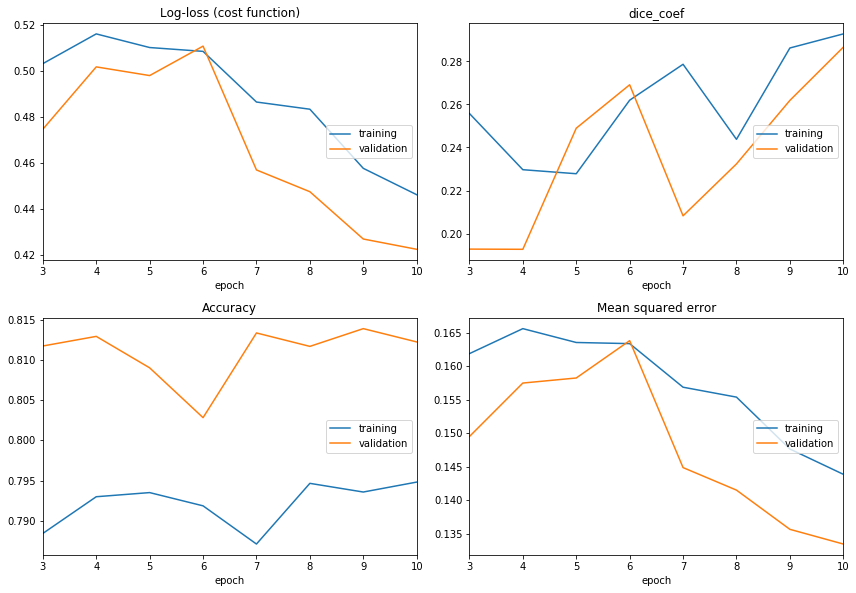

Log-loss (cost function):
training   (min:    0.446, max:    0.649, cur:    0.446)
validation (min:    0.422, max:    0.546, cur:    0.422)

dice_coef:
training   (min:    0.228, max:    0.293, cur:    0.293)
validation (min:    0.193, max:    0.287, cur:    0.287)

Accuracy:
training   (min:    0.713, max:    0.795, cur:    0.795)
validation (min:    0.802, max:    0.814, cur:    0.812)

Mean squared error:
training   (min:    0.144, max:    0.212, cur:    0.144)
validation (min:    0.133, max:    0.179, cur:    0.133)

Epoch 00010: val_loss improved from 0.42683 to 0.42236, saving model to model-dsbowl2018-1.h5


In [125]:
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=10, verbose=1)
EPOCHS = 10

history = simpleFCN.fit(X_train,y_train, validation_data=(X_valid,y_valid),callbacks = [PlotLossesKeras(), earlystopper, checkpointer, MetricsCheckpoint('logs')],epochs = EPOCHS, verbose=1)

In [0]:
def print_measure (history_):
    
    measure_ = ['val_loss', 'val_acc', 'mean_squared_error']    
    for cur_measure in measure_:
        
        print ('---' + cur_measure + '---')
        for i in range (len(history_[cur_measure])):
            val_ = history_[cur_measure][i]
            print ('%d epoch: %.4f'  % (i+1, val_))

In [127]:
print_measure (history.history)

---val_loss---
1 epoch: 0.5458
2 epoch: 0.5068
3 epoch: 0.4746
4 epoch: 0.5017
5 epoch: 0.4979
6 epoch: 0.5107
7 epoch: 0.4569
8 epoch: 0.4474
9 epoch: 0.4268
10 epoch: 0.4224
---val_acc---
1 epoch: 0.8019
2 epoch: 0.8092
3 epoch: 0.8118
4 epoch: 0.8130
5 epoch: 0.8090
6 epoch: 0.8028
7 epoch: 0.8134
8 epoch: 0.8117
9 epoch: 0.8139
10 epoch: 0.8123
---mean_squared_error---
1 epoch: 0.2115
2 epoch: 0.1798
3 epoch: 0.1619
4 epoch: 0.1656
5 epoch: 0.1635
6 epoch: 0.1634
7 epoch: 0.1569
8 epoch: 0.1554
9 epoch: 0.1476
10 epoch: 0.1439


# Show results for training, validation, and test

In [0]:
def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, simpleFCN):
    model = simpleFCN     

    ix = random.randint(0, len(X_train_))
    input_ = X_train_[ix:ix+1]
    mask_ = y_train_[ix:ix+1]
    preds_train = model.predict(input_)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("X_train")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("Y_train")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_train_t[0][:,:,0], 'gray')
    plt.show()
    
    ix = random.randint(0, len(X_valid_))
    input_ = X_valid_[ix:ix+1]
    mask_ = y_valid_[ix:ix+1]
    preds_valid = model.predict(input_)
    preds_valid_t = (preds_valid > 0.5).astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("X_valid")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("Y_valid")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_valid_t[0][:,:,0], 'gray')
    plt.show()
    
    ix = random.randint(0, len(X_test_))
    input_ = X_test_[ix:ix+1]
    mask_ = y_test_[ix:ix+1]
    preds_test = model.predict(input_)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("X_test")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("Y_test")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_test_t[0][:,:,0], 'gray')
    plt.show()

1/1 [==============================] - 0s 12ms/step


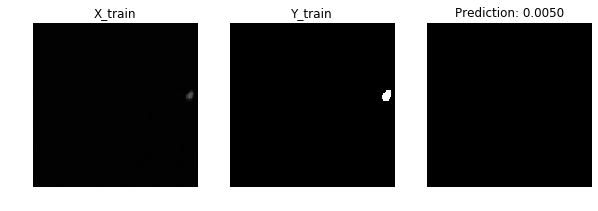

1/1 [==============================] - 0s 11ms/step


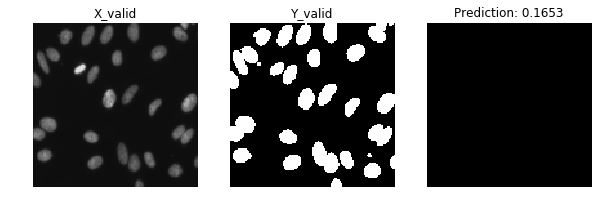

1/1 [==============================] - 0s 12ms/step


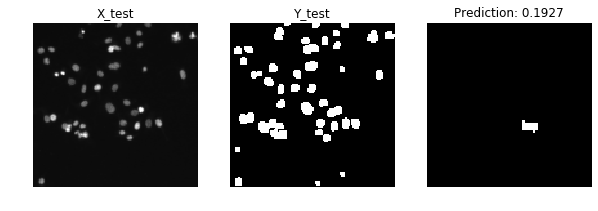

In [131]:
plotPredictions(X_train,y_train,X_valid, y_valid, X_test,y_test,simpleFCN)

# Evalutation of trained model

In [113]:
ret = simpleFCN.evaluate(X_test, y_test)
print ('metric: ', simpleFCN.metrics_names)
print ('ret: ', ret)

134/134 [==============================] - 1s 10ms/step
metric:  ['loss', 'dice_coef', 'acc', 'mean_squared_error']
ret:  [0.39715937580635297, 0.3496087918530649, 0.8144426497060862, 0.12608258604113734]


# 좀더 복잡한 분할 알고리즘 UNET으로 학습하기


# <img src ="img/unet.png">

In [0]:
def get_UNET():
    # Build U-Net model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255) (inputs)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
    model_UNET = Model(inputs=[inputs], outputs=[outputs])
    
#     model_UNET.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef, 'acc', 'mse'])
    model_UNET.compile(optimizer='adam', loss=dice_coef_loss, metrics = [dice_coef, 'acc', 'mse'])
    
    
    
    return model_UNET

In [0]:
unet = get_UNET()
simpleFCN.metrics_names
unet.summary()

In [0]:
checkpointer = ModelCheckpoint('model-dsbowl2018-2.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)

EPOCHS = 30

history = unet.fit(X_train,y_train,batch_size=16,verbose=0,epochs=30,validation_data=(X_valid,y_valid),callbacks = [PlotLossesKeras(), earlystopper, checkpointer, MetricsCheckpoint('logs')])

In [0]:

print_measure (history.history)

# Show results for training, validation, and test

In [0]:
plotPredictions(X_train,y_train,X_valid,y_valid,X_test,y_test,unet)

# Evalutation of trained model


In [0]:
ret = unet.evaluate (X_test, y_test)
print ('dice: %.4f' % ret[1])